In [1]:
from google.colab import drive
import pandas as pd
import os
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


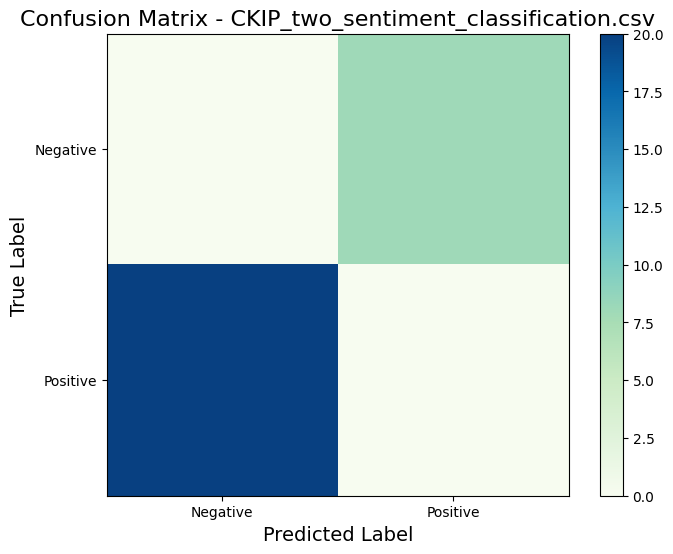

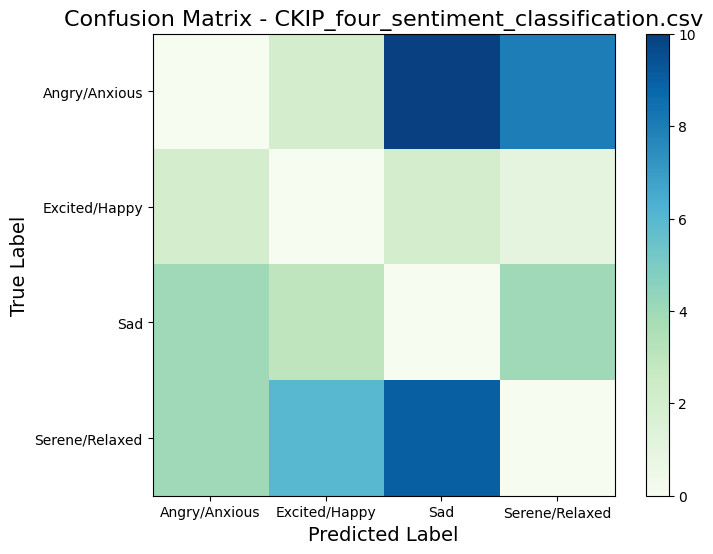

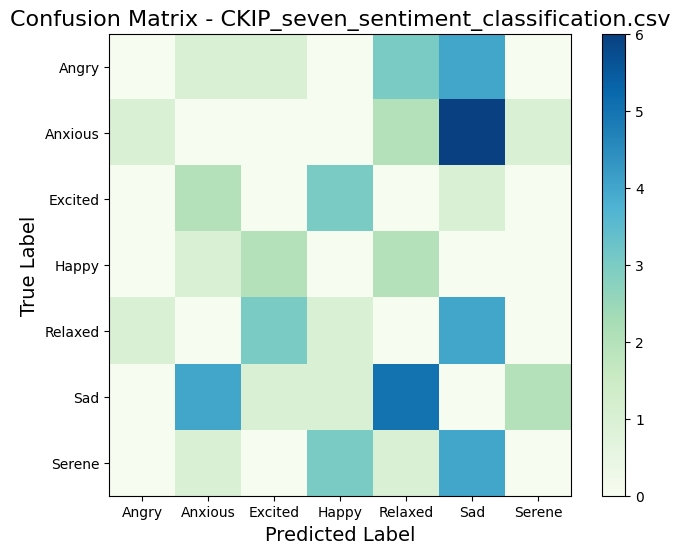

In [4]:
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/TFM/dataset/Errors/CKIP'

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read the data
        df = pd.read_csv(os.path.join(folder_path, filename))
        incorrect_predictions = df[df['Predicted Sentiment'] != df['Actual Sentiment']]
        confusion_matrix = pd.crosstab(incorrect_predictions['Actual Sentiment'], incorrect_predictions['Predicted Sentiment'])

        # plot the confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(confusion_matrix, interpolation='nearest', cmap='GnBu')
        plt.title(f'Confusion Matrix - {filename}', fontsize=16)
        plt.colorbar()
        plt.xticks(range(len(confusion_matrix.columns)), confusion_matrix.columns)
        plt.yticks(range(len(confusion_matrix.index)), confusion_matrix.index)
        plt.xlabel('Predicted Label', fontsize=14)
        plt.ylabel('True Label', fontsize=14)
        plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


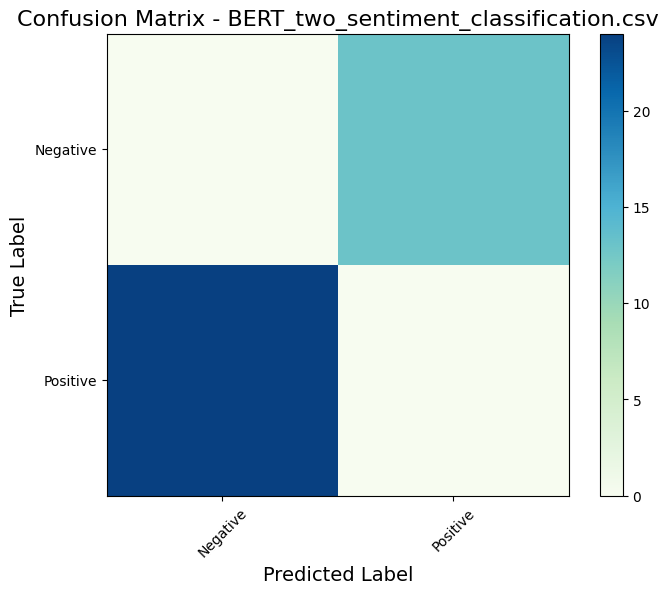

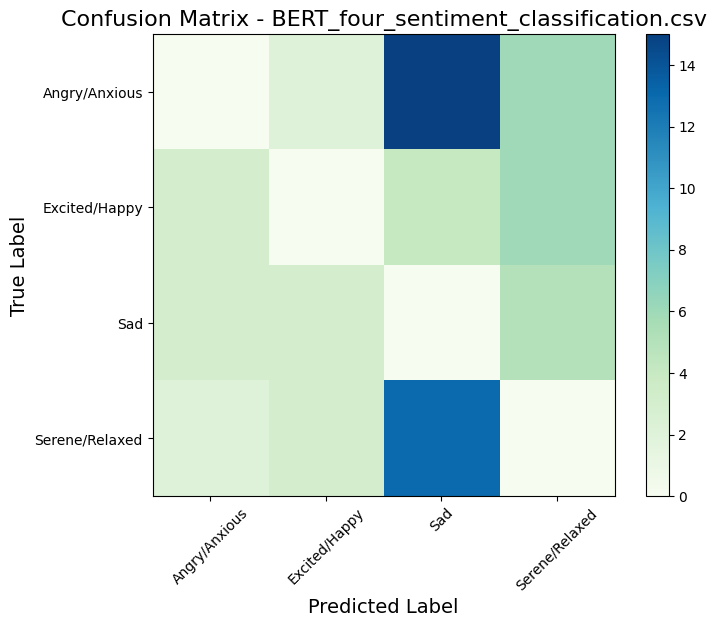

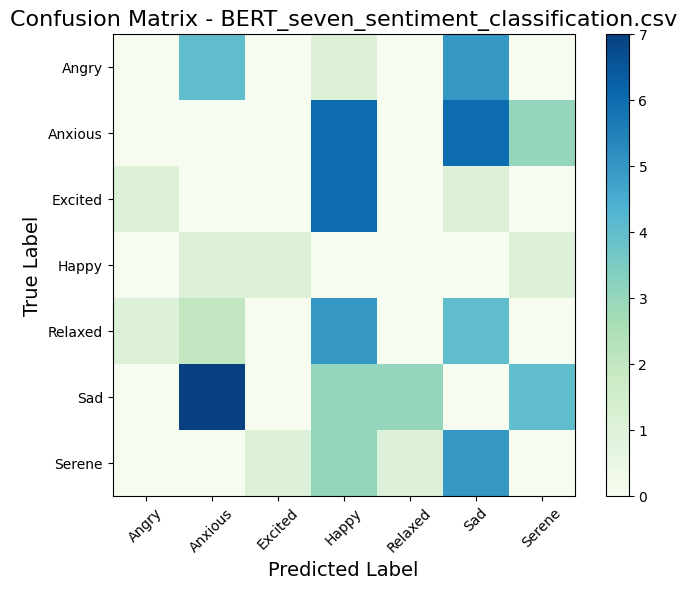

In [8]:
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/TFM/dataset/Errors/BERT'


label_maps = {
    'BERT_two_sentiment_classification.csv': {'Predicted': {0: 'Negative', 1: 'Positive'}, 'Actual': {0: 'Negative', 1: 'Positive'}},
    'BERT_four_sentiment_classification.csv': {'Predicted': {0: 'Angry/Anxious', 1: 'Sad', 2: 'Serene/Relaxed', 3: 'Excited/Happy'}, 'Actual': {0: 'Angry/Anxious', 1: 'Sad', 2: 'Serene/Relaxed', 3: 'Excited/Happy'}},
    'BERT_seven_sentiment_classification.csv': {'Predicted': {0: 'Angry', 1: 'Anxious', 2: 'Sad', 3: 'Serene', 4: 'Relaxed', 5: 'Happy', 6: 'Excited'}, 'Actual': {0: 'Angry', 1: 'Anxious', 2: 'Sad', 3: 'Serene', 4: 'Relaxed', 5: 'Happy', 6: 'Excited'}}
}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read the data
        df = pd.read_csv(os.path.join(folder_path, filename))


        label_map = label_maps.get(filename, {})


        for column in ['Predicted', 'Actual']:
            df[column] = df[column].map(label_map.get(column, {}))

        incorrect_predictions = df[df['Predicted'] != df['Actual']]
        confusion_matrix = pd.crosstab(incorrect_predictions['Actual'], incorrect_predictions['Predicted'])

        # plot the confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(confusion_matrix, interpolation='nearest', cmap='GnBu')
        plt.title(f'Confusion Matrix - {filename}', fontsize=16)
        plt.colorbar()
        plt.xticks(range(len(confusion_matrix.columns)), confusion_matrix.columns, rotation=45)
        plt.yticks(range(len(confusion_matrix.index)), confusion_matrix.index)
        plt.xlabel('Predicted Label', fontsize=14)
        plt.ylabel('True Label', fontsize=14)
        plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


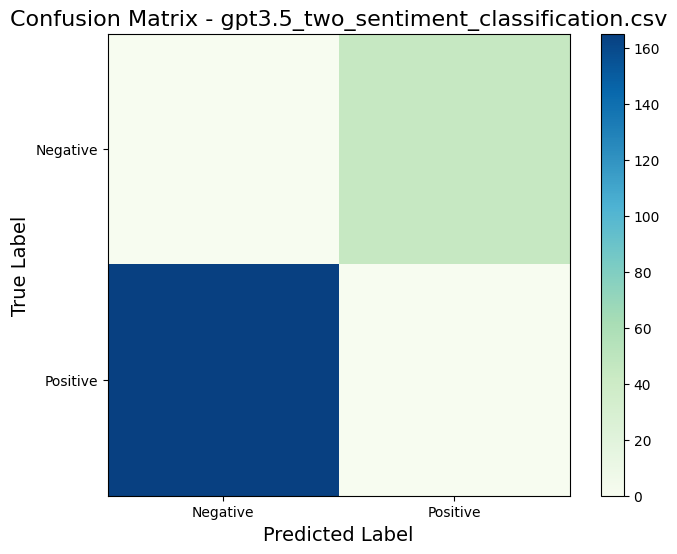

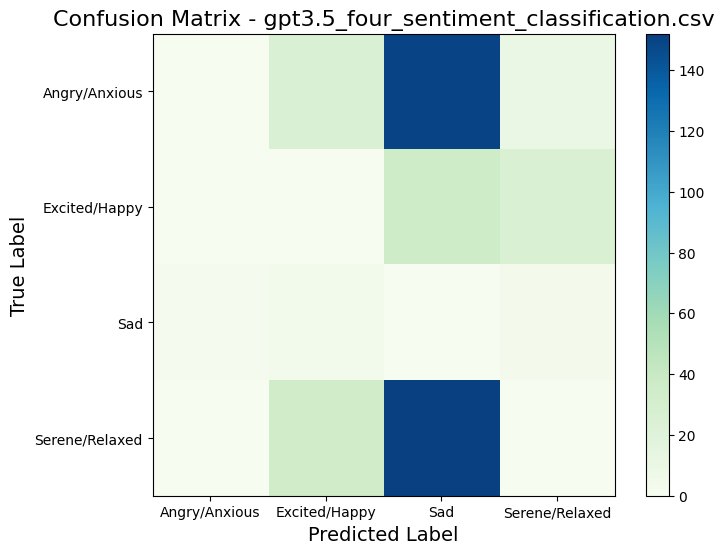

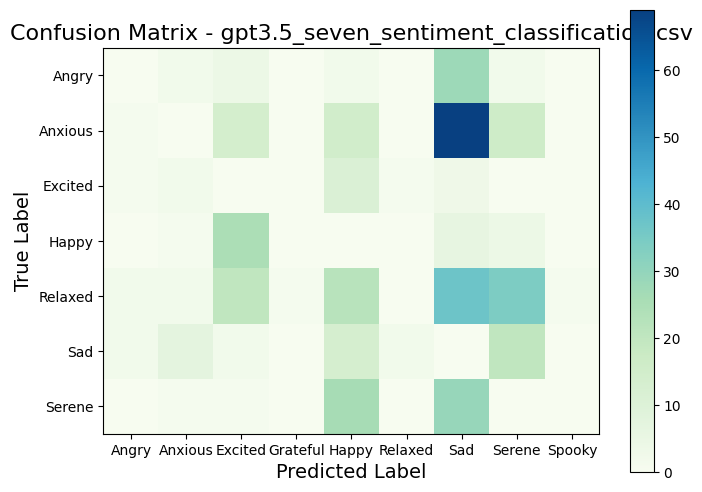

In [9]:
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/TFM/dataset/Errors/GPT'

column_mapping = {
    'gpt3.5_two_sentiment_classification.csv': {'predicted_column': 'gpt_sentiment_2', 'actual_column': 'human_2'},
    'gpt3.5_four_sentiment_classification.csv': {'predicted_column': 'gpt_sentiment_4', 'actual_column': 'human_4'},
    'gpt3.5_seven_sentiment_classification.csv': {'predicted_column': 'gpt_sentiment_all', 'actual_column': 'human_all'}
}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read the data
        df = pd.read_csv(os.path.join(folder_path, filename))

        columns = column_mapping.get(filename, {})
        predicted_column = columns.get('predicted_column', 'Predicted Sentiment')
        actual_column = columns.get('actual_column', 'Actual Sentiment')

        incorrect_predictions = df[df[predicted_column] != df[actual_column]]
        confusion_matrix = pd.crosstab(incorrect_predictions[actual_column], incorrect_predictions[predicted_column])


        plt.figure(figsize=(8, 6))
        plt.imshow(confusion_matrix, interpolation='nearest', cmap='GnBu')
        plt.title(f'Confusion Matrix - {filename}', fontsize=16)
        plt.colorbar()
        plt.xticks(range(len(confusion_matrix.columns)), confusion_matrix.columns)
        plt.yticks(range(len(confusion_matrix.index)), confusion_matrix.index)
        plt.xlabel('Predicted Label', fontsize=14)
        plt.ylabel('True Label', fontsize=14)
        plt.show()
